# 1.4.2 Image Thresholding

## Simple Thresholding

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

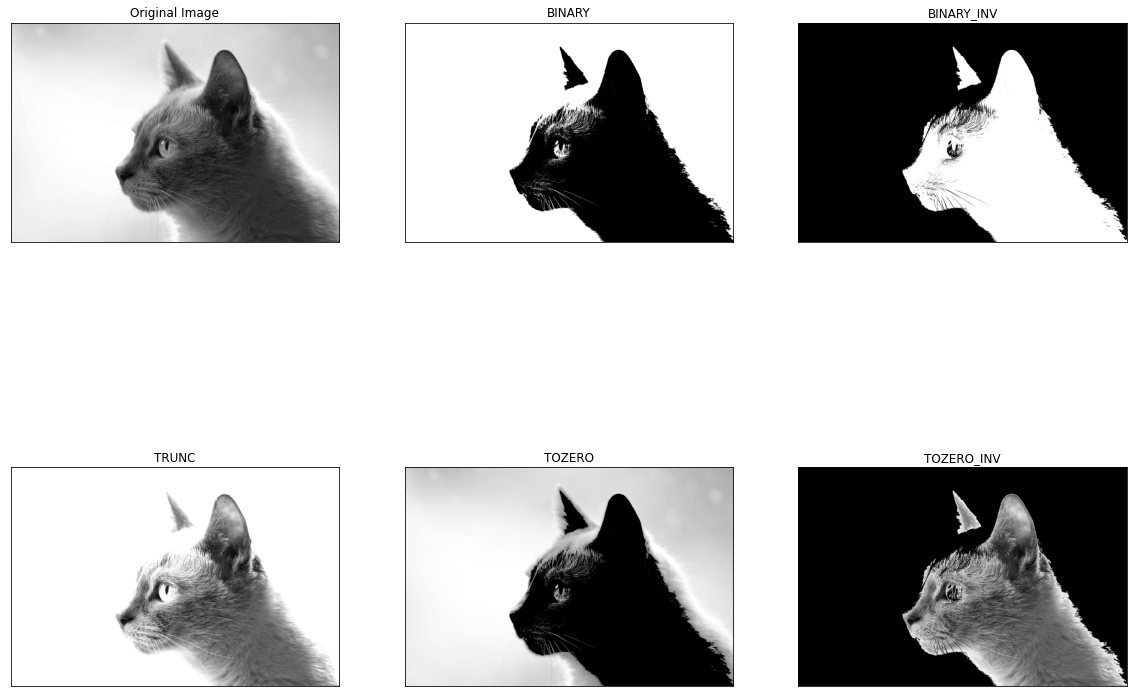

In [2]:
img = cv2.imread('image.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(20,15))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [24]:
h,w = 256,512
gray = np.zeros((h,w),np.uint8)
for i in range(h):
    for j in range(w):
        gray[i,j]=i+j%256

In [22]:
cv2.imshow('image',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

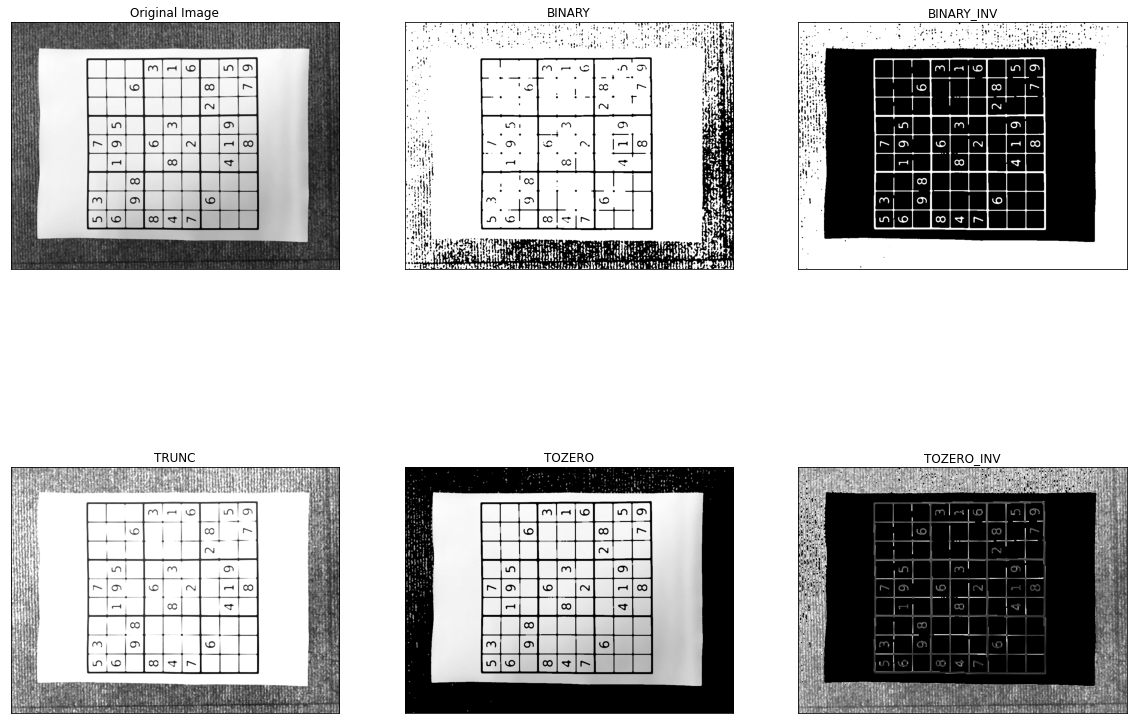

In [25]:
ret,thresh1 = cv2.threshold(img,63,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(20,15))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

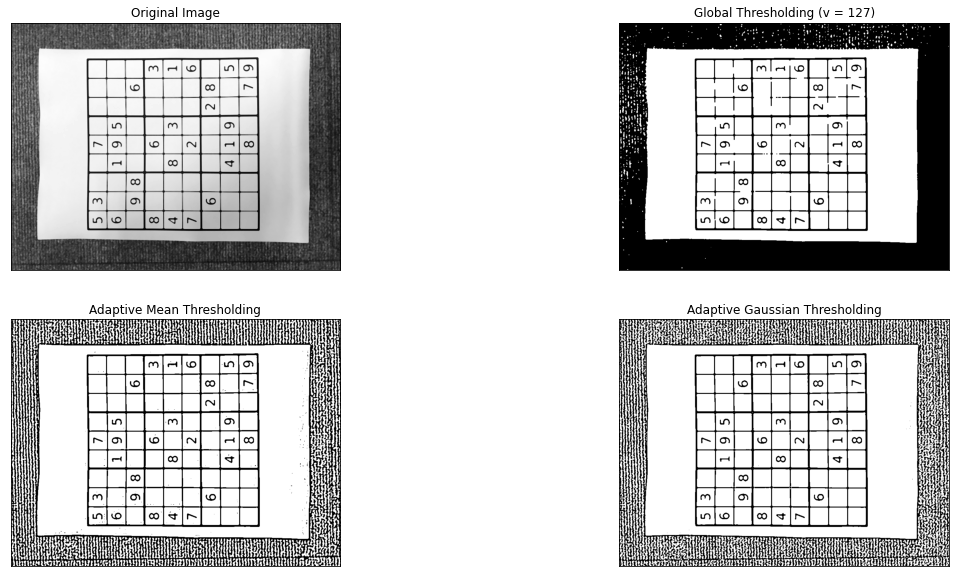

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img1.jpg',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Otsu's Binarization

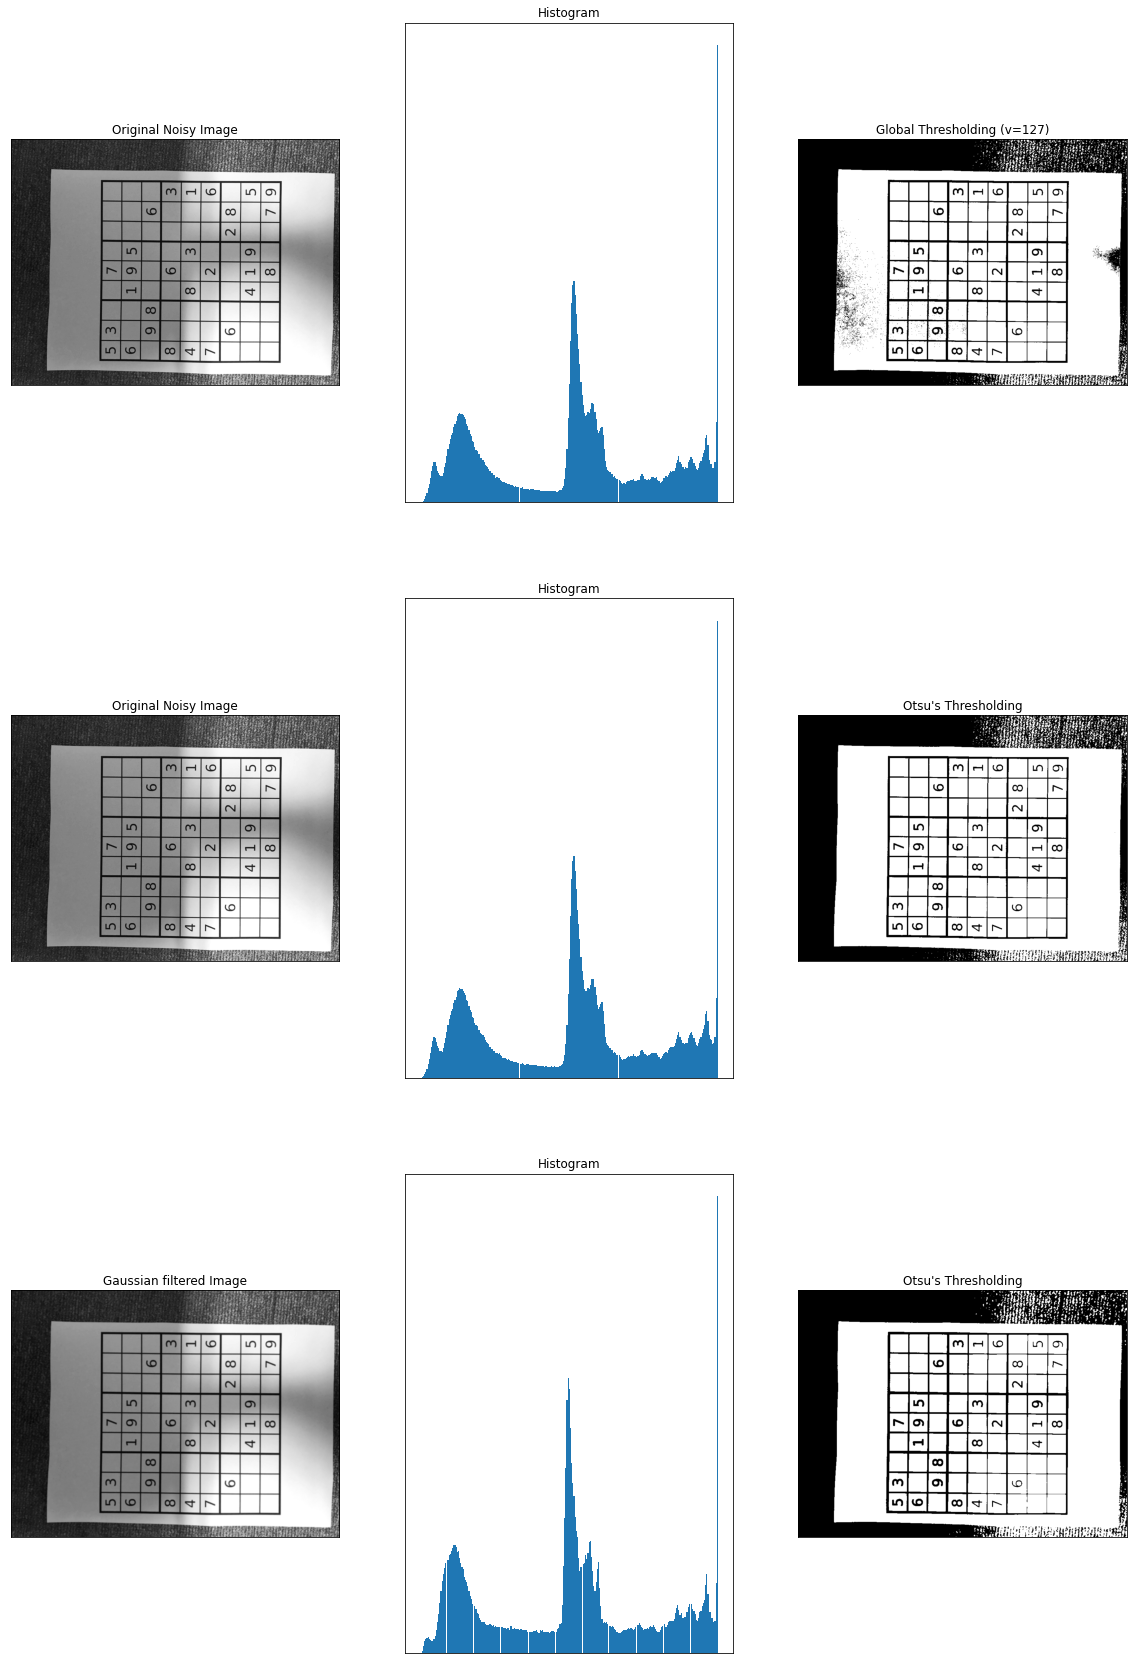

In [28]:
img = cv2.imread('img2.jpg',0)
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
img, 0, th2,
blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)','Original Noisy Image','Histogram',"Otsu's Thresholding",'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(20,30))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()


## Histogram

In [23]:
img = cv2.imread('img3.jpg',0)

In [24]:
h,w=img.shape

In [25]:
hist=np.zeros(256,np.uint32)

In [26]:
hist

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

In [27]:
for i in range(h):
    for j in range(w):
        hist[img[i,j]]+=1

In [28]:
hist

array([    0,     0,     1,     2,    18,    36,    71,   149,   260,
         419,   686,  1015,  1397,  1997,  2631,  3134,  3777,  4356,
        4964,  5501,  5717,  5952,  6105,  6276,  6448,  6602,  6846,
        7081,  7012,  7153,  7041,  7039,  7021,  6970,  6842,  6763,
        6593,  6640,  6407,  6488,  6301,  6316,  6411,  6359,  6168,
        6121,  5964,  6242,  6148,  6095,  6097,  5964,  5840,  5818,
        5857,  5724,  5671,  5667,  5706,  5650,  5634,  5658,  5483,
        5477,  5410,  5391,  5297,  5439,  5365,  5113,  5090,  5221,
        5109,  4968,  4939,  4842,  4823,  4780,  4923,  4768,  4687,
        4561,  4612,  4518,  4631,  4508,  4490,  4386,  4489,  4552,
        4363,  4314,  4327,  4314,  4104,  4127,  4181,  4153,  4173,
        3974,  4013,  4064,  3920,  3861,  3889,  3936,  3902,  3842,
        3855,  3896,  3742,  3602,  3587,  3596,  3666,  3703,  3584,
        3509,  3544,  3319,  3377,  3345,  3443,  3426,  3390,  3356,
        3241,  3236,

## Exercise Draw Histogram

In [29]:
h, w, ch = 256, 512,3
histImage = np.zeros((h,w,3),np.uint8)

In [35]:
for i in range(256):
    l=(int)((hist[i]/10000)*255)
    histImage = cv2.rectangle(histImage,(2*i,h-0),(2*i+2,h-l),(0,255,0),1)

In [36]:
cv2.imshow('image', histImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

## with Noise

In [44]:
import random
h,w = 256,512
img = np.zeros((h,w),np.uint8)
for i in range(h):
    for j in range(w):
        img[i,j]=(j)%256

In [45]:
for i in range((int)(h/2)):
    for j in range((int)(w/2)):
        img[i+int(h/4),j+int(w/4)]=32

In [51]:
noiseImg=np.copy(img)
m = 16
for i in range(h):
    for j in range(w):
        value = noiseImg[i,j]+random.randint(-m,m)
        if value<0:
            noiseImg[i,j] = 0
        elif value>255:
            noiseImg[i,j] = 255
        else:
            noiseImg[i,j] = value           

In [52]:
cv2.imshow('image',img)
cv2.imshow('noise image',noiseImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

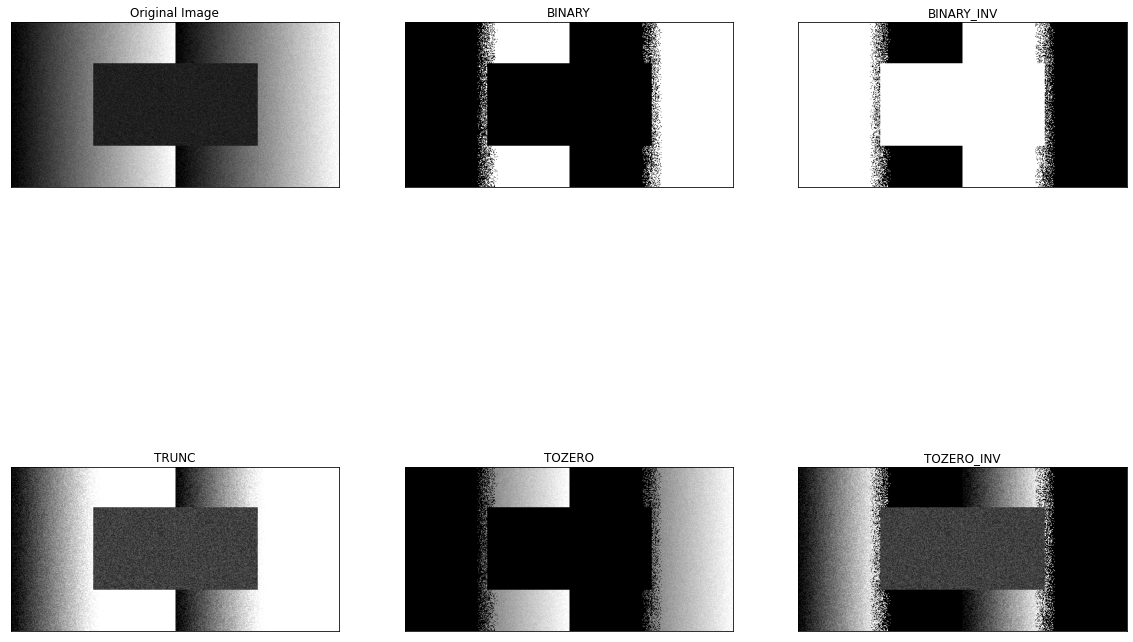

In [53]:
img = cv2.imread('image.jpg',0)
ret,thresh1 = cv2.threshold(noiseImg,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(noiseImg,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(noiseImg,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(noiseImg,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(noiseImg,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [noiseImg, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(20,15))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

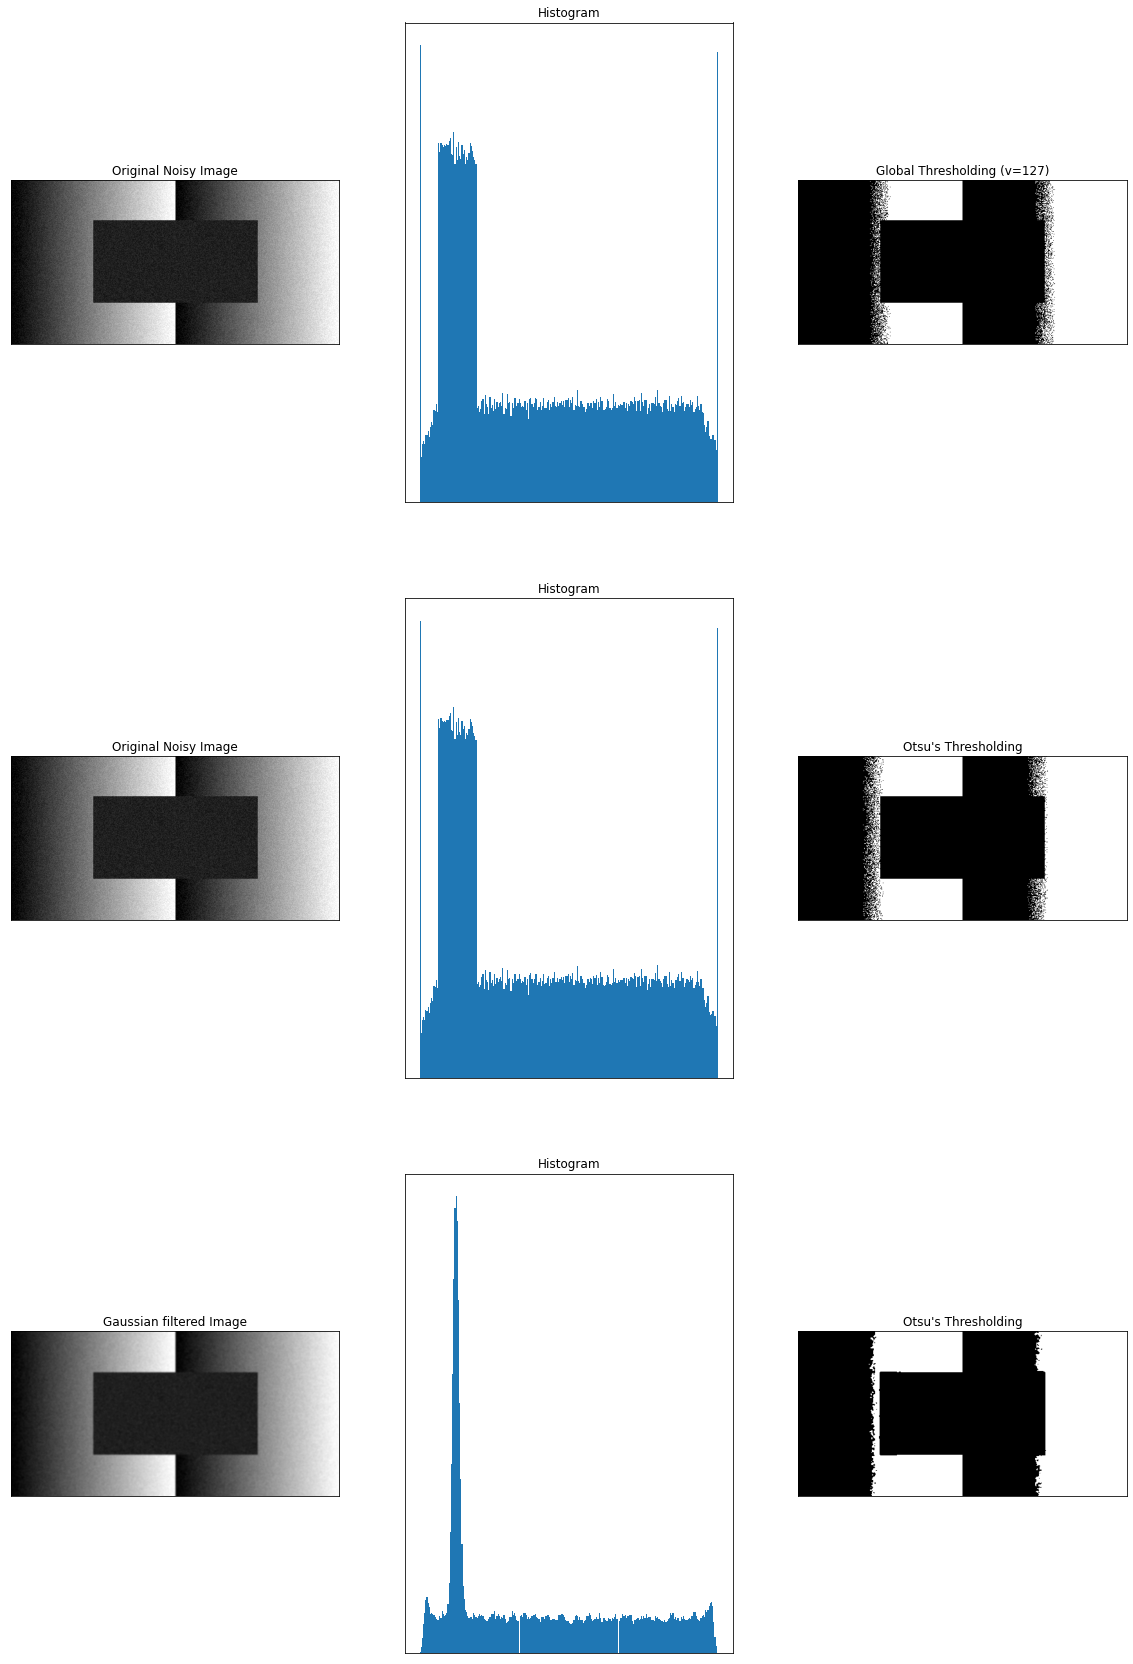

In [55]:
# global thresholding
ret1,th1 = cv2.threshold(noiseImg,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(noiseImg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(noiseImg,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [noiseImg, 0, th1, noiseImg, 0, th2, blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)','Original Noisy Image','Histogram',"Otsu's Thresholding",'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(20,30))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()